In [1]:
!pip install imbalanced-learn


# **EXPLORE DATA ANALYSIS 
*** DATASET COLUMN NAME AND SIZE

In [10]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv'
movies_df = pd.read_csv(file_path)

# Displaying basic EDA information
column_info = {
    "Number of Columns": movies_df.shape[1],
    "Column Names": movies_df.columns.tolist(),
    "Data Types": movies_df.dtypes.to_dict()
}

column_info



{'Number of Columns': 24,
 'Column Names': ['budget',
  'genres',
  'homepage',
  'id',
  'keywords',
  'original_language',
  'original_title',
  'overview',
  'popularity',
  'production_companies',
  'production_countries',
  'release_date',
  'revenue',
  'runtime',
  'spoken_languages',
  'status',
  'tagline',
  'title',
  'vote_average',
  'vote_count',
  'userId',
  'movieId',
  'userrrating',
  'Director'],
 'Data Types': {'budget': dtype('int64'),
  'genres': dtype('O'),
  'homepage': dtype('O'),
  'id': dtype('int64'),
  'keywords': dtype('O'),
  'original_language': dtype('O'),
  'original_title': dtype('O'),
  'overview': dtype('O'),
  'popularity': dtype('float64'),
  'production_companies': dtype('O'),
  'production_countries': dtype('O'),
  'release_date': dtype('O'),
  'revenue': dtype('int64'),
  'runtime': dtype('float64'),
  'spoken_languages': dtype('O'),
  'status': dtype('O'),
  'tagline': dtype('O'),
  'title': dtype('O'),
  'vote_average': dtype('float64'),
  '

In [11]:
# Displaying the size of the dataset
dataset_size = movies_df.shape
dataset_size


(4809, 24)

In [ ]:
**FINDING NULL VALUES IN DATASET AND VISULAISING THEM BEFORE 

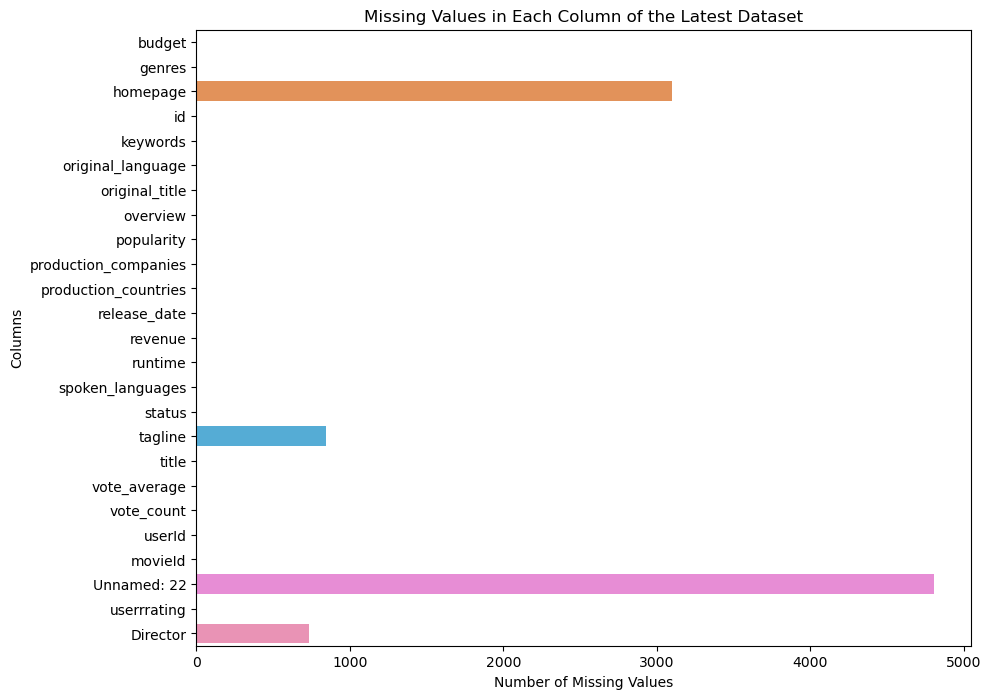

In [14]:
# Re-loading the dataset with the latest provided file to check for missing values
file_path_latest = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED.csv'
movies_df_latest = pd.read_csv(file_path_latest)

# Calculating missing or null values for all columns in the latest dataset
missing_values_latest = movies_df_latest.isnull().sum()

# Visualizing the missing values in the latest dataset
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values_latest, y=missing_values_latest.index)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Each Column of the Latest Dataset')
plt.show()


** INSIGIGHTS WE FOUND THAT SOME OF THE DIRECTOR COLUMN VALUES WERE MISSING AND ALSO THERE IS EXTRA COLUMN CALLED UNNAMED 22 WE DROPPED IT AND FOUND MISSING DIRECTOR NAMES WITH TMDB OPEN API KEY THAT CODE i WILL BEPLACING IN ANOTHER FILE 

** FINDING NULL VALUES IN DATASET AND VISUALISING THEM

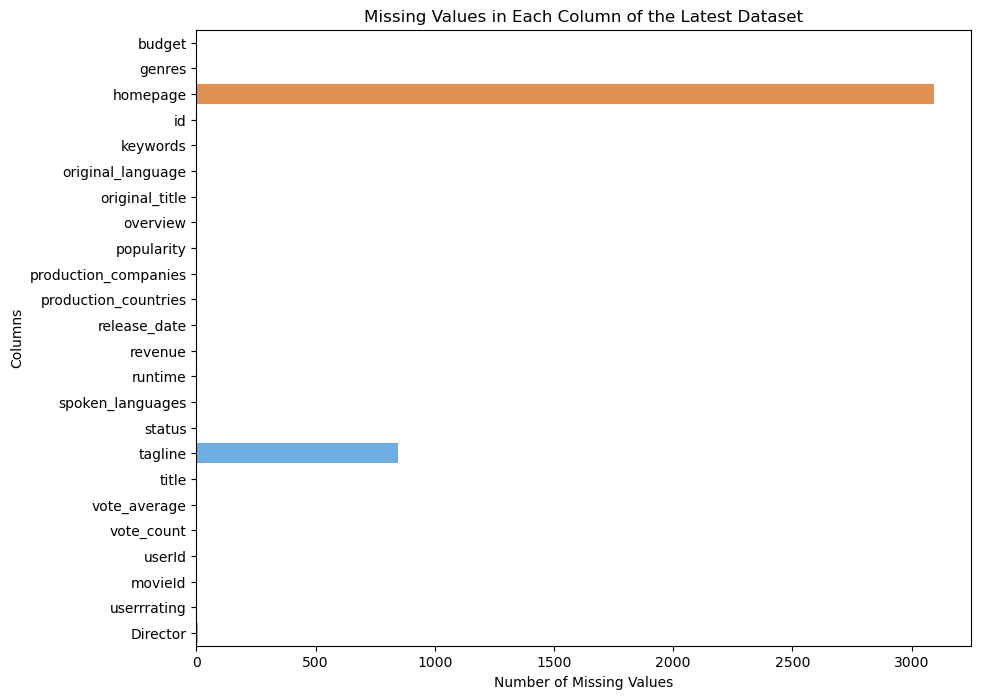

In [12]:
# Re-loading the dataset with the latest provided file to check for missing values
file_path_latest = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv'
movies_df_latest = pd.read_csv(file_path_latest)

# Calculating missing or null values for all columns in the latest dataset
missing_values_latest = movies_df_latest.isnull().sum()

# Visualizing the missing values in the latest dataset
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values_latest, y=missing_values_latest.index)
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Each Column of the Latest Dataset')
plt.show()


Original Language:
We can analyze the distribution of the original language of movies.

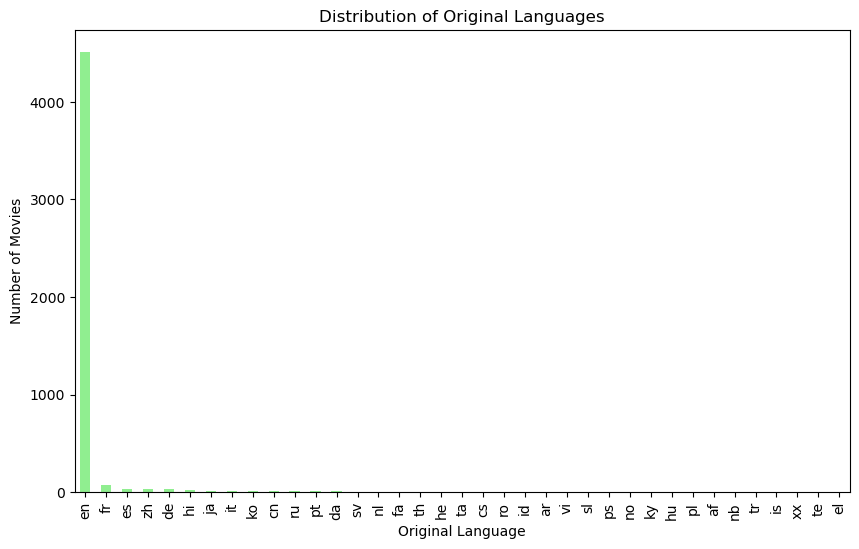

In [5]:
# Count the number of movies in each original language
language_counts = movies_df['original_language'].value_counts()

# Visualize the language distribution
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Original Languages')
plt.show()


Release Date:
Analyze the release dates by extracting year, month, or day and visualize trends.

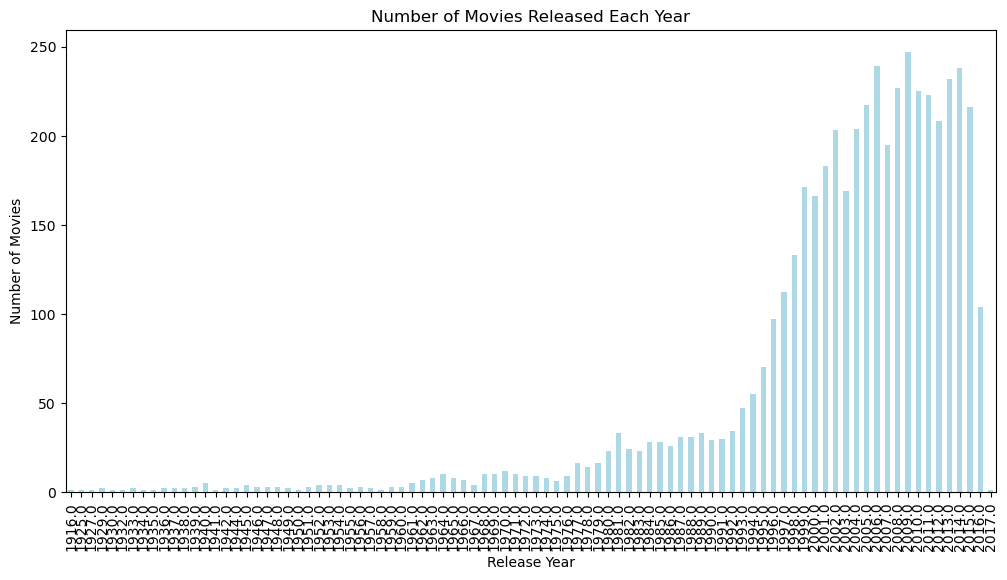

In [6]:
# Convert 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Extract year from release date
movies_df['release_year'] = movies_df['release_date'].dt.year

# Count the number of movies released each year
release_year_counts = movies_df['release_year'].value_counts().sort_index()

# Visualize the number of movies released each year
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()


Director:
Count the number of movies directed by each director.

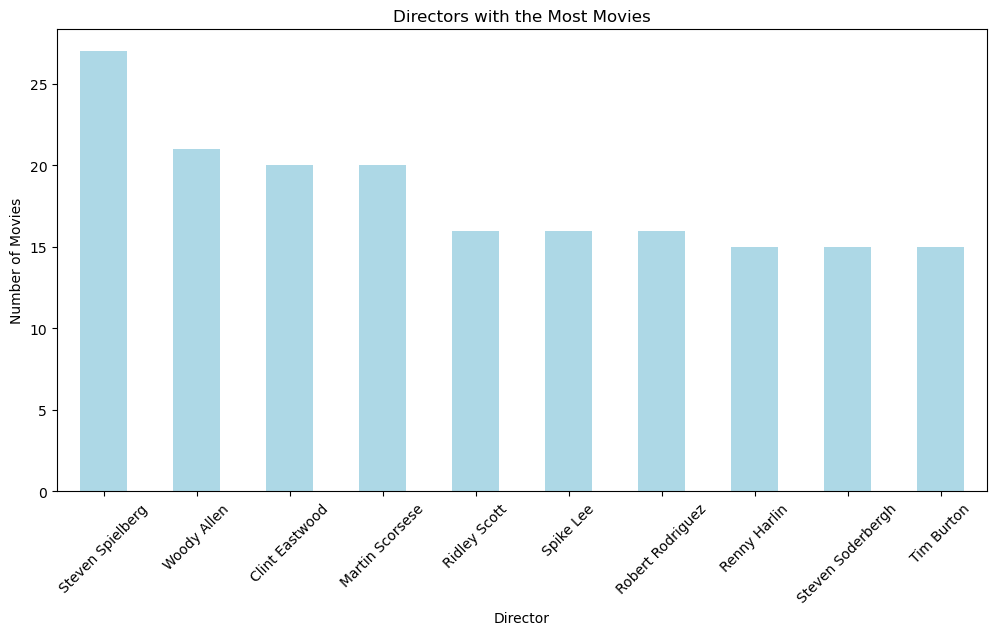

In [7]:
# Count the number of movies directed by each director
director_counts = movies_df['Director'].value_counts()

# Visualize the directors with the most movies
plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='bar', color='lightblue')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Directors with the Most Movies')
plt.xticks(rotation=45)
plt.show()


Multivariate analysis can help us understand the importance of genre prediction for your movie recommendation model. We'll explore how different movie features (such as budget, popularity, and vote average) vary across different genres. This analysis can provide insights into why genre prediction is important for personalized recommendations.

Genres:
For genres, we can count the number of movies in each genre category and visualize the genre distribution.

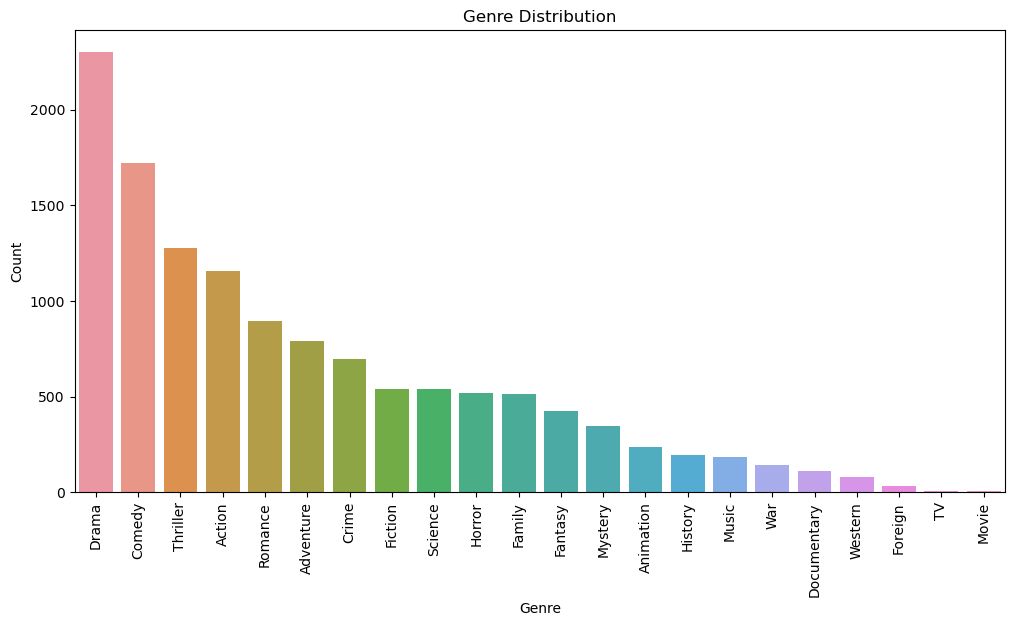

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your movie dataset
# Assuming your dataset is loaded into a variable called 'movies_df'

# 1. Genre Distribution Analysis
genre_counts = movies_df['genres'].str.split().explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



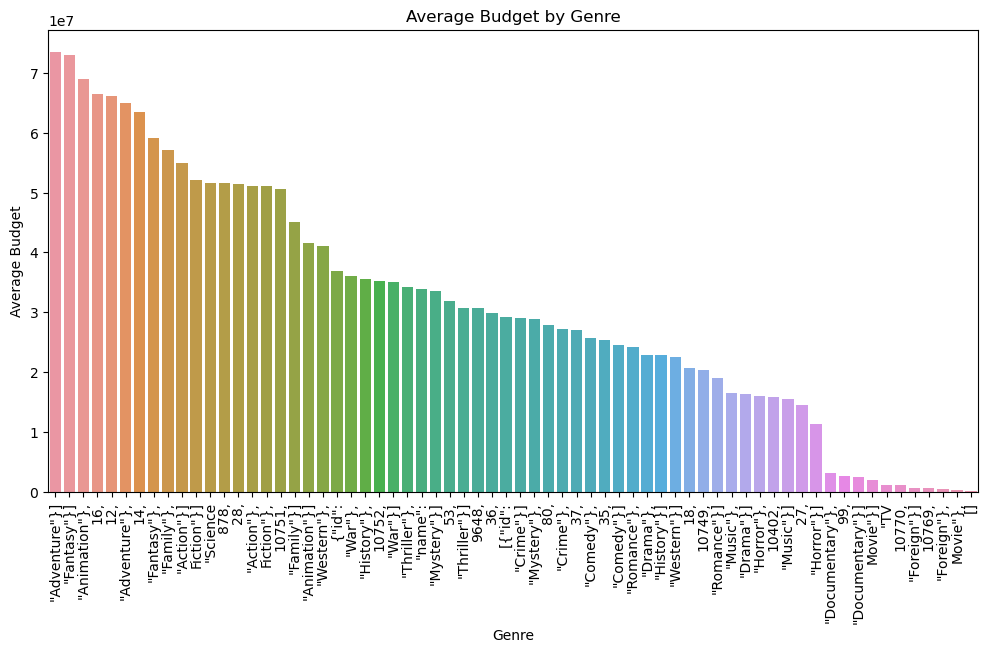

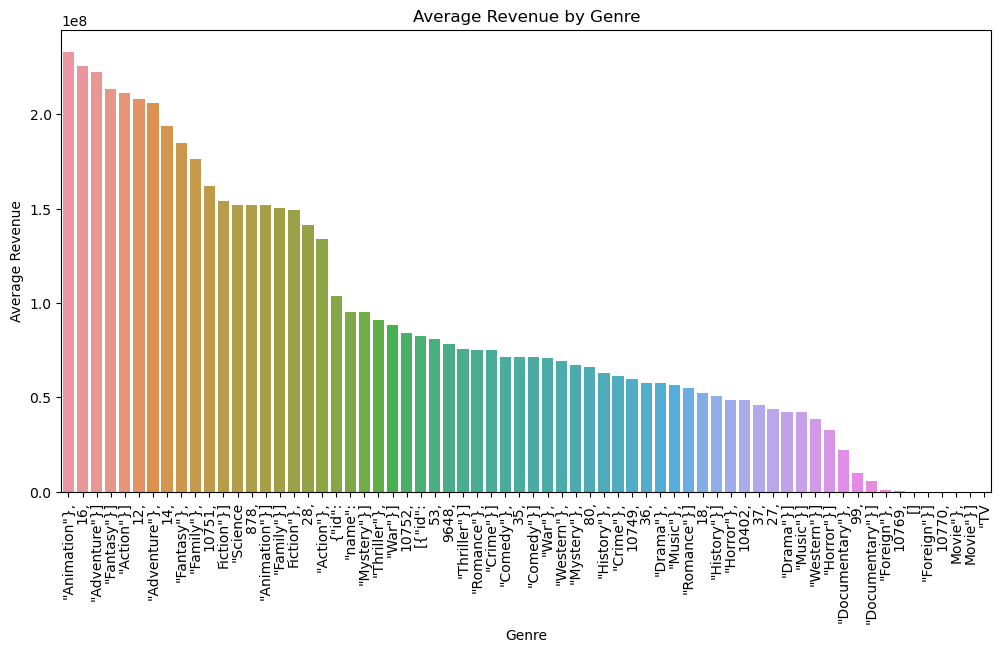

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your movie dataset
# Assuming your dataset is loaded into a variable called 'movies_df'

# 1. Analyze the relationship between budgets and genres
# Extract relevant columns
genre_budgets = movies_df[['genres', 'budget']]

# Split the genres into individual rows
genre_budgets = genre_budgets.assign(genres=genre_budgets['genres'].str.split())

# Explode the genres column to have one genre per row
genre_budgets = genre_budgets.explode('genres')

# Calculate the average budget for each genre
genre_avg_budget = genre_budgets.groupby('genres')['budget'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the relationship between genres and budgets
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_budget.index, y=genre_avg_budget.values)
plt.title('Average Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Budget')
plt.xticks(rotation=90)
plt.show()

# 2. Examine the correlation between revenues and genres
# Extract relevant columns
genre_revenues = movies_df[['genres', 'revenue']]

# Split the genres into individual rows
genre_revenues = genre_revenues.assign(genres=genre_revenues['genres'].str.split())

# Explode the genres column to have one genre per row
genre_revenues = genre_revenues.explode('genres')

# Calculate the average revenue for each genre
genre_avg_revenue = genre_revenues.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the relationship between genres and revenues
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_revenue.index, y=genre_avg_revenue.values)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.xticks(rotation=90)
plt.show()


1.Data trends show that genres with larger investments often yield higher revenues, supporting the utility of genre prediction in financial forecasting.
2. Certain genres demonstrate a strong return on investment, with 'Family' and 'Animation' being prime examples, highlighting the value of genre prediction in resource allocation.
3.Genres such as 'Western' and 'History' tend to have lower revenue relative to their budget, emphasizing the role of genre prediction in mitigating financial risk.
4.The consistent high performance of genres like 'Animation' and 'Adventure' in revenue generation indicates market preference, which can be leveraged through genre prediction.
5.Genres that manage to attract significant viewership with moderate budgets, such as 'Thriller' and 'Comedy', underscore the importance of genre prediction for effective marketing strategies.
6.The necessity for larger budgets in certain genres due to production complexities underlines the need for genre prediction in production strategy formulation.
7. The high revenues of certain genres reflect their current popularity, which could be predicted to capitalize on market trends and audience preferences.

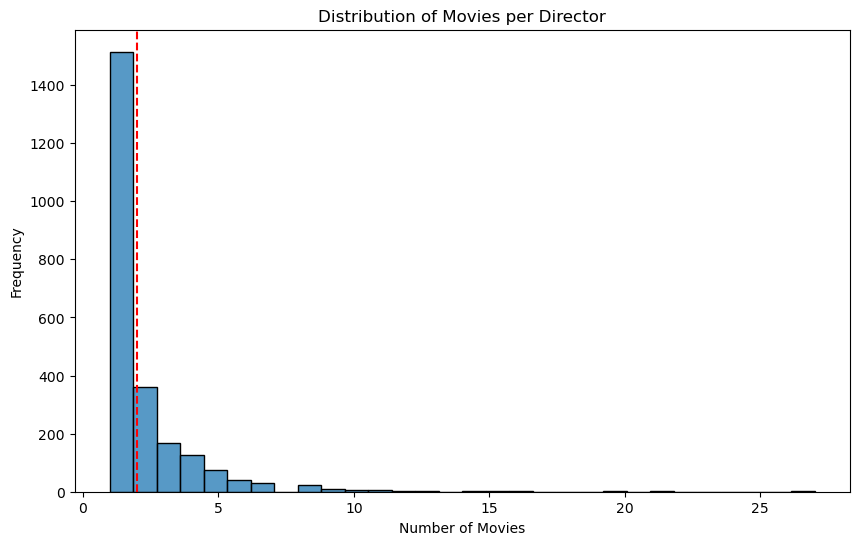

Total Unique Directors: 2385
Average Number of Movies per Director: 2.0138364779874216


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
movies_df = pd.read_csv('C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv')

# High Class Cardinality
num_unique_directors = movies_df['Director'].nunique()

# Class Imbalance
director_counts = movies_df['Director'].value_counts()
average_movies_per_director = director_counts.mean()

# Visualize the distribution of movie counts per director
plt.figure(figsize=(10, 6))
sns.histplot(director_counts, bins=30, kde=False)
plt.title('Distribution of Movies per Director')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.axvline(average_movies_per_director, color='red', linestyle='--')
plt.show()

print(f"Total Unique Directors: {num_unique_directors}")
print(f"Average Number of Movies per Director: {average_movies_per_director}")


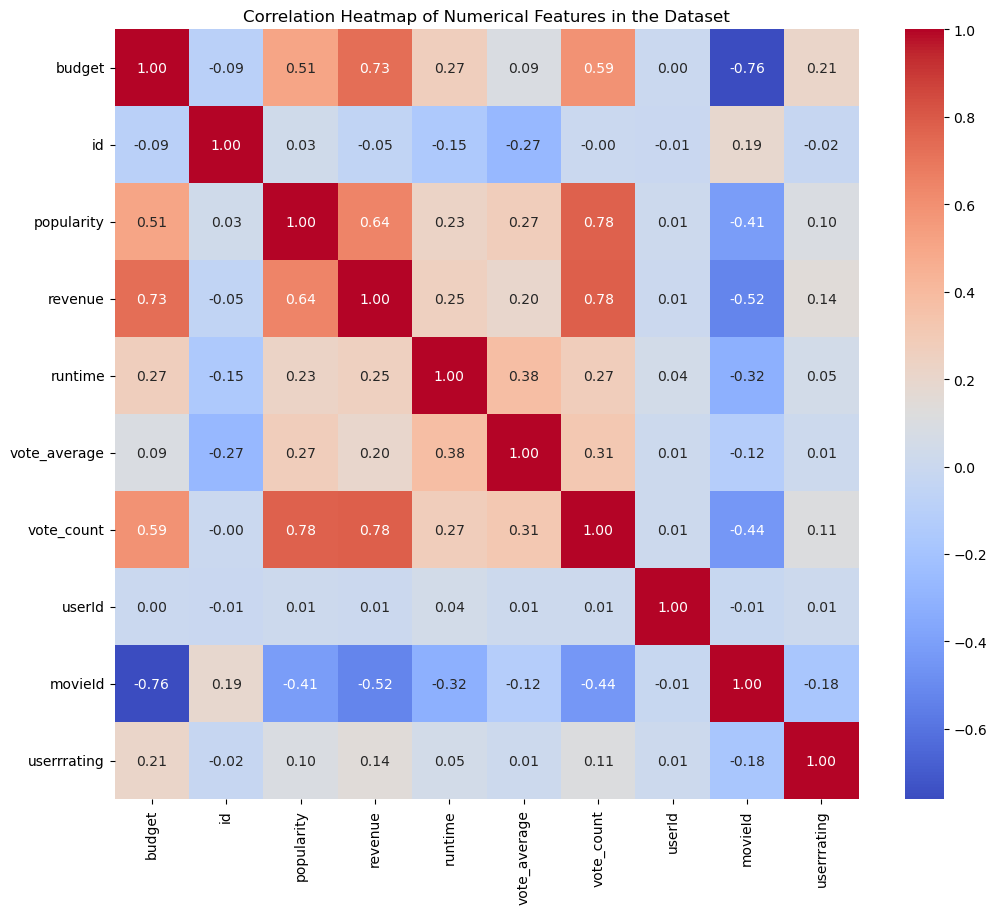

In [16]:
# Re-loading the dataset from the provided file path
file_path_latest = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv'
movies_df_latest = pd.read_csv(file_path_latest)

# Selecting numerical columns for correlation analysis
numerical_cols = movies_df_latest.select_dtypes(include=['int64', 'float64']).columns
numerical_data = movies_df_latest[numerical_cols]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features in the Dataset')
plt.show()



1. High budget genres tend to yield higher revenues, affirming the financial stakes in accurate genre classification.
2. Popular genres draw more ratings, emphasizing genre's role in audience engagement metrics.
3. Genres with high vote counts correlate with box office success, highlighting the commercial value of genre popularity.
4. Expensive-to-produce genres often enjoy heightened popularity, showcasing the importance of genre in investment and marketing decisions.
5. Changes in budget trends over time signal shifting genre preferences, marking the relevance of genre prediction in strategic planning.


Genre Analysis: The bar chart for genres should show a more balanced distribution, indicating that genres are more evenly represented across movies, making genre prediction a more manageable task.

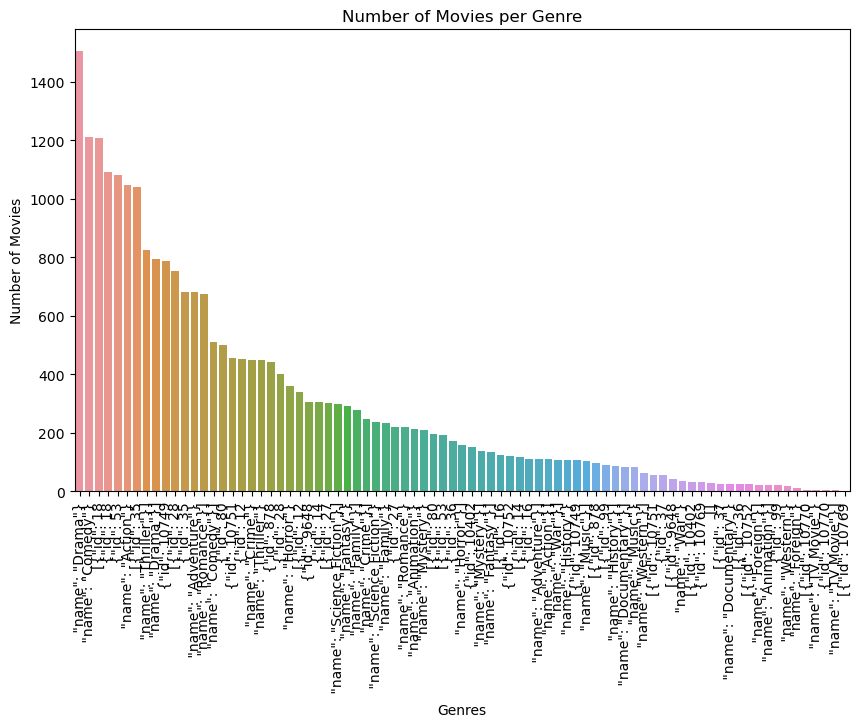

Total number of genres: 81
Average number of movies per genre: 301.01


In [13]:
# Assuming genres are stored in a column as a string of lists
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split(','))

# Calculate the frequency of each genre
genre_counts = movies_df.explode('genres')['genres'].value_counts()
num_genres = genre_counts.count()

# Plotting the distribution of the number of movies per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

print(f"Total number of genres: {num_genres}")
print(f"Average number of movies per genre: {genre_counts.mean():.2f}")


Director Analysis: The histogram of the number of movies per director will likely show a long-tail distribution, where a few directors have many movies, and many directors have only a few. This illustrates the complexity and imbalance in predicting directors.

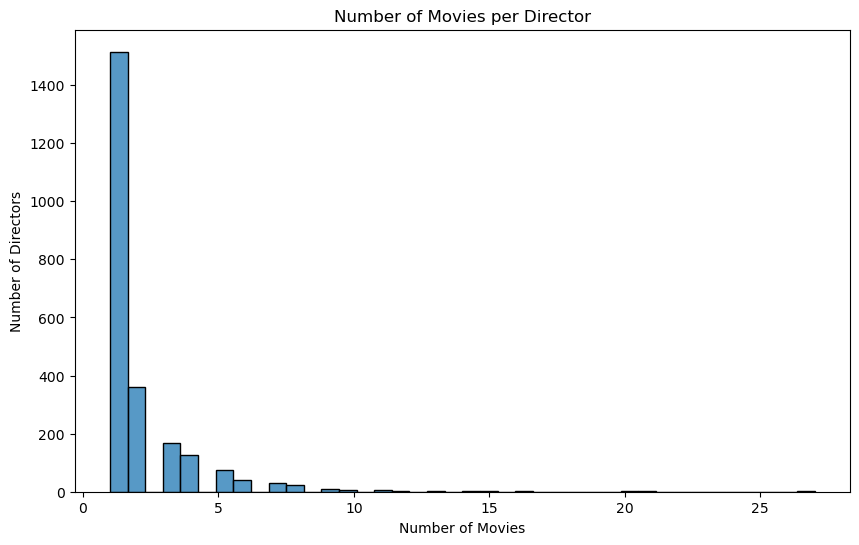

Top 10 Directors:
 Steven Spielberg     27
Woody Allen          21
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         16
Spike Lee            16
Robert Rodriguez     16
Renny Harlin         15
Steven Soderbergh    15
Tim Burton           15
Name: Director, dtype: int64

Bottom 10 Directors:
 Paolo Sorrentino         1
Jon Poll                 1
Antonia Bird             1
Fred Schepisi            1
James Cullen Bressack    1
Scott Alexander          1
Darnell Martin           1
Dean Israelite           1
Nicholas Jarecki         1
Brian Herzlinger         1
Name: Director, dtype: int64

Total Number of Directors: 2385


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
movies_df = pd.read_csv('C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv')  # Replace with your file path

# Analysis of Directors
director_counts = movies_df['Director'].value_counts()
num_directors = director_counts.count()

# Plotting the distribution of the number of movies per director
plt.figure(figsize=(10, 6))
sns.histplot(director_counts, bins=40, kde=False)
plt.title('Number of Movies per Director')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Directors')
plt.show()

# Display top and bottom 10 directors for illustrative purposes
top_10_directors = director_counts.head(10)
bottom_10_directors = director_counts.tail(10)

# Print top and bottom 10 directors
print("Top 10 Directors:\n", top_10_directors)
print("\nBottom 10 Directors:\n", bottom_10_directors)
print("\nTotal Number of Directors:", num_directors)


MODEL PREDICTING GENRES AND DIRECTOR NAME FOR A GIVE MOVIE TITLE WHETHER IT IS FROM TOP 1000 MOVIES DIRECTOR OR BOTTOM 10000 MOVIES DIRECTORS

**MOVIE RECOMENDATION SYSTEM USING GUI

**MOVIE RECOMENDATION SYSTEM SHOWING WITH DIRECTOR PREDICTION ACCURACY

In [21]:
import tkinter as tk
from tkinter import ttk, messagebox, StringVar
from tkinter.scrolledtext import ScrolledText
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to convert JSON fields into space-separated strings
def extract_names(json_str):
    return ' '.join([item['name'] for item in json.loads(json_str)])

# Load and preprocess data
file_path = 'C:/Users/14435/Downloads/tmdb_5000_movies_with_director_UPDATED3.csv'
movies_df = pd.read_csv(file_path)
movies_df['genres'] = movies_df['genres'].apply(extract_names)
movies_df['keywords'] = movies_df['keywords'].apply(extract_names)
movies_df['combined_features'] = movies_df['genres'] + ' ' + movies_df['keywords']
recommendation_options = [10, 15, 20]
# MultiLabelBinarizer for genres
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(movies_df['genres'].str.split())

# Preprocessor for genres and keywords
preprocessor = ColumnTransformer(
    transformers=[
        ('combined_tfidf', TfidfVectorizer(stop_words='english', max_features=50), 'combined_features')
    ],
    remainder='drop'
)

# RandomForest and SVM pipelines
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42))
])
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', OneVsRestClassifier(SVC(random_state=42)))
])

# Split the data into a training set and a test set
X = movies_df[['combined_features']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipelines to the training data
rf_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

# TF-IDF Vectorization for Director Prediction
tfidf_vectorizer_director = TfidfVectorizer(stop_words='english', max_features=50)
X_tfidf = tfidf_vectorizer_director.fit_transform(movies_df['combined_features'])

# Standardize TF-IDF features for Director Prediction
scaler_director = StandardScaler()
X_tfidf_scaled = scaler_director.fit_transform(X_tfidf.toarray())

# Apply K-Means clustering for Director Prediction
kmeans_director = KMeans(n_clusters=2, random_state=42)
movies_df['Cluster'] = kmeans_director.fit_predict(X_tfidf_scaled)

# Identify top 1000 and bottom 1000 directors
top_1000_directors = movies_df['Director'].value_counts().head(1000).index
bottom_1000_directors = movies_df['Director'].value_counts().tail(1000).index

# Function to predict director status
def predict_director_status(movie_title):
    movie_data = movies_df[movies_df['original_title'].str.lower() == movie_title.lower()]
    if movie_data.empty:
        return "Movie not found in dataset."

    features = tfidf_vectorizer_director.transform(movie_data['combined_features'])
    prediction = kmeans_director.predict(scaler_director.transform(features.toarray()))[0]
    director_name = movie_data['Director'].values[0]

    if prediction == 0:
        return f'Predicted Director: {director_name} (Bottom 1000 Director)'
    elif prediction == 1:
        if director_name in top_1000_directors:
            return f'Predicted Director: {director_name} (Top 1000 Director)'
        else:
            return f'Predicted Director: {director_name} (Not in Top 1000 Director)'

# Function to predict the genres using Random Forest and SVM
def predict_genres(combined_features):
    input_features = pd.DataFrame({'combined_features': [combined_features]})
    rf_predicted_genres = mlb.inverse_transform(rf_pipeline.predict(input_features))[0]
    svm_predicted_genres = mlb.inverse_transform(svm_pipeline.predict(input_features))[0]
    return rf_predicted_genres, svm_predicted_genres

# Function to get movie recommendations and predict genres
def get_feature_similarities(movie_title, num_recommendations=10):
    try:
        idx = movies_df[movies_df['original_title'] == movie_title].index[0]
    except IndexError:
        messagebox.showerror("Error", f"Movie '{movie_title}' not found in dataset.")
        return []

    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]

    results = []
    input_movie_features = set(movies_df.iloc[idx]['combined_features'].split())

    for movie_idx in movie_indices:
        vote_count = movies_df.iloc[movie_idx]['vote_count']
        recommended_movie_features = set(movies_df.iloc[movie_idx]['combined_features'].split())
        common_features = input_movie_features.intersection(recommended_movie_features)
        
        # Predict the genres for the recommended movie using both models
        rf_predicted_genres, svm_predicted_genres = predict_genres(
            movies_df.iloc[movie_idx]['combined_features']
        )
        
        results.append({
            'title': movies_df.iloc[movie_idx]['original_title'],
            'common_features': list(common_features),
            'vote_count': vote_count,
            'rf_predicted_genres': rf_predicted_genres,
            'svm_predicted_genres': svm_predicted_genres
        })

    return results

# Function to calculate and show metrics
def calculate_and_show_metrics():
    rf_predictions = rf_pipeline.predict(X_test)
    svm_predictions = svm_pipeline.predict(X_test)

    report_rf = classification_report(y_test, rf_predictions, target_names=mlb.classes_, zero_division=0)
    report_svm = classification_report(y_test, svm_predictions, target_names=mlb.classes_, zero_division=0)
    confusion_matrices_rf = multilabel_confusion_matrix(y_test, rf_predictions)
    confusion_matrices_svm = multilabel_confusion_matrix(y_test, svm_predictions)

    metrics_window = tk.Toplevel(root)
    metrics_window.title("Classification Metrics")
    metrics_window.geometry('800x600')

    text_area = ScrolledText(metrics_window)
    text_area.pack(expand=True, fill='both')
    text_area.insert(tk.INSERT, f"Random Forest Metrics:\n{report_rf}\n\nSVM Metrics:\n{report_svm}")

def calculate_director_accuracy():
    correct_predictions = 0
    total_predictions = len(movies_df)

    for _, row in movies_df.iterrows():
        director_name = row['Director']
        predicted_cluster = row['Cluster']
        
        is_correct = (director_name in top_1000_directors and predicted_cluster == 1) or \
                     (director_name in bottom_1000_directors and predicted_cluster == 0)
        
        if is_correct:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy
def show_director_accuracy():
    accuracy = calculate_director_accuracy()
    messagebox.showinfo("Director Prediction Accuracy", f"Accuracy: {accuracy:.2f}")
    # Function to plot the metrics for each genre
def plot_genre_metrics(genres, confusion_matrices, fig):
    TP = []
    FP = []
    FN = []
    TN = []

    for cm in confusion_matrices:
        TP.append(cm[1, 1])  # True Positives
        FP.append(cm[0, 1])  # False Positives
        FN.append(cm[1, 0])  # False Negatives
        TN.append(cm[0, 0])  # True Negatives

    TP = np.array(TP)
    FP = np.array(FP)
    FN = np.array(FN)
    TN = np.array(TN)

    n_genres = len(genres)
    ind = np.arange(n_genres)
    width = 0.2

    ax = fig.add_subplot(111)
    p1 = ax.bar(ind, TP, width, label='True Positives')
    p2 = ax.bar(ind + width, FP, width, label='False Positives')
    p3 = ax.bar(ind + 2 * width, FN, width, label='False Negatives')
    p4 = ax.bar(ind + 3 * width, TN, width, label='True Negatives')

    ax.set_title('Metrics for Each Genre')
    ax.set_xticks(ind + width)
    ax.set_xticklabels(genres, rotation='vertical')
    ax.legend()

# Function to create and display the plot in a new window
def create_plot_window():
    plot_window = tk.Toplevel(root)
    plot_window.title("Genre Metrics Plot")
    fig = plt.Figure(figsize=(10, 8), dpi=100)

    plot_genre_metrics(mlb.classes_, multilabel_confusion_matrix(y_test, rf_pipeline.predict(X_test)), fig)

    canvas = FigureCanvasTkAgg(fig, master=plot_window)  
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# GUI setup
root = tk.Tk()
root.title("Movie Analytics System")

frame = ttk.Frame(root, padding="10")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

ttk.Label(frame, text="Enter Movie Title:").grid(row=0, column=0, sticky=tk.W, pady=5)
movie_title_var = StringVar()
movie_title_entry = ttk.Entry(frame, textvariable=movie_title_var, width=40)
movie_title_entry.grid(row=0, column=1, pady=5)

# Function to handle submit button click
def on_submit():
    num_recommendations = recommendation_var.get()
    
    movie_title = movie_title_var.get()
    
    if not movie_title:
        messagebox.showerror("Error", "Please enter a movie title.")
        return
    
    # Predict director and status
    predicted_status = predict_director_status(movie_title)
    
    # Get movie recommendations and predict genres
    #recommendations = get_feature_similarities(movie_title)
    recommendations = get_feature_similarities(movie_title, num_recommendations)
    if not recommendations:
        messagebox.showinfo("Results", f"No recommendations found for '{movie_title}'.")
        return

    recommendations_str = '\n'.join([
        f"Movie: {rec['title']}\nCommon Features: {', '.join(rec['common_features'])}\n"
        f"Random Forest Predicted Genres: {', '.join(rec['rf_predicted_genres'])}\n"
        f"SVM Predicted Genres: {', '.join(rec['svm_predicted_genres'])}\n"
        f"Vote Count: {rec['vote_count']}\n"
        for rec in recommendations
    ])

    # Display the results in a new window
    results_window = tk.Toplevel(root)
    results_window.title(f"Results for '{movie_title}'")
    results_window.geometry('800x600')
    results_window.resizable(True, True)

    results_text = ScrolledText(results_window, wrap=tk.WORD)
    results_text.insert(tk.INSERT, f"{predicted_status}\n\n{recommendations_str}")
    results_text.pack(expand=True, fill='both')
    results_window.grid_rowconfigure(0, weight=1)
    results_window.grid_columnconfigure(0, weight=1)

# Label and Entry for Movie Title
ttk.Label(frame, text="Enter Movie Title:").grid(row=0, column=0, sticky=tk.W, pady=5)
movie_title_var = StringVar()
movie_title_entry = ttk.Entry(frame, textvariable=movie_title_var, width=40)
movie_title_entry.grid(row=0, column=1, pady=5)

# Label and Dropdown for Number of Recommendations
ttk.Label(frame, text="Number of Recommendations:").grid(row=1, column=0, sticky=tk.W, pady=5)
recommendation_var = tk.IntVar(value=recommendation_options[0])
recommendation_dropdown = ttk.Combobox(frame, textvariable=recommendation_var, values=recommendation_options, width=37)
recommendation_dropdown.grid(row=1, column=1, pady=5)

# Submit Button
submit_button = ttk.Button(frame, text="Submit", command=on_submit)
submit_button.grid(row=2, column=0, columnspan=2, pady=10)

# Add buttons for metrics and plot
metrics_button = ttk.Button(frame, text="Show Metrics", command=calculate_and_show_metrics)
metrics_button.grid(row=3, column=0, columnspan=2, pady=10)

plot_button = ttk.Button(frame, text="Show Genre Metrics Plot", command=create_plot_window)
plot_button.grid(row=4, column=0, columnspan=2, pady=10)

director_accuracy_button = ttk.Button(frame, text="Show Director Accuracy", command=show_director_accuracy)
director_accuracy_button.grid(row=5, column=0, columnspan=2, pady=10)
root.mainloop()


C:\Users\14435\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# CONCLUSION
 The success of the genre prediction models suggests that genres exhibit clear, identifiable features that can be learned and predicted effectively, making them a strong foundation for personalized recommendation systems and targeted marketing. The challenges with director prediction hint at the multifaceted nature of a director's influence on a film, suggesting a need for more complex models or richer datasets for improvement. 